# Importing Libraries for Data Analysis and Visualization

In [1]:
import pandas as pd  #for data handling and wrangling
import numpy as np
import matplotlib.pyplot as plt # for plotting and data visualization
import seaborn as sb # for plotting and data visualization
import sklearn as sk
%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Loading the Dataset

In [3]:
train_data_file_path = './assets/processed.csv'
data = pd.read_csv(train_data_file_path)
print(data.head())

   Unnamed: 0  Rooms  Distance  Bedroom2  Bathroom  Car  BuildingArea  \
0           0      2       2.5         2         1    0          79.0   
1           1      3       2.5         3         2    0         150.0   
2           2      4       2.5         3         1    2         142.0   
3           3      3       2.5         4         2    0         210.0   
4           4      2       2.5         2         1    2         107.0   

   Lattitude  Longtitude  Age    Price  
0   -37.8079    144.9934  118  1035000  
1   -37.8093    144.9944  118  1465000  
2   -37.8072    144.9941    4  1600000  
3   -37.8024    144.9993  108  1876000  
4   -37.8060    144.9954  128  1636000  


# Data Wrangling and Preprocessing

Unnamed: 0      0
Rooms           0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
BuildingArea    0
Lattitude       0
Longtitude      0
Age             0
Price           0
dtype: int64

In [5]:
# Percentage of missing values
data.isnull().sum()/len(data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.792107
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2         22.425300
Bathroom         22.445836
Car              23.479481
Landsize         32.748058
BuildingArea     59.554369
YearBuilt        53.886436
CouncilArea       0.006845
Lattitude        21.696273
Longtitude       21.696273
Regionname        0.006845
Propertycount     0.006845
dtype: float64

In [6]:
# Remove rows missing data
data = data.dropna()

In [5]:
lis= ['Postcode','Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']
for colname in lis:
    data[colname] = data[colname].astype('category')  

KeyError: 'Postcode'

In [7]:
data.info()
#information of dataset after droping not available data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696 entries, 0 to 7695
Data columns (total 11 columns):
Unnamed: 0      7696 non-null int64
Rooms           7696 non-null int64
Distance        7696 non-null float64
Bedroom2        7696 non-null int64
Bathroom        7696 non-null int64
Car             7696 non-null int64
BuildingArea    7696 non-null float64
Lattitude       7696 non-null float64
Longtitude      7696 non-null float64
Age             7696 non-null int64
Price           7696 non-null int64
dtypes: float64(4), int64(7)
memory usage: 661.5 KB


In [9]:
#Dropping Columns that are not used in data analysis
data_new=data.drop(['Bedroom2','Method','Date','SellerG','Postcode','CouncilArea','Propertycount'],axis=1)
print(data_new.head())


        Suburb          Address  Rooms Type      Price  Distance  Bathroom  \
2   Abbotsford  25 Bloomburg St      2    h  1035000.0       2.5       1.0   
4   Abbotsford     5 Charles St      3    h  1465000.0       2.5       2.0   
6   Abbotsford      55a Park St      4    h  1600000.0       2.5       1.0   
11  Abbotsford     124 Yarra St      3    h  1876000.0       2.5       2.0   
14  Abbotsford    98 Charles St      2    h  1636000.0       2.5       1.0   

    Car  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
2   0.0     156.0          79.0     1900.0   -37.8079    144.9934   
4   0.0     134.0         150.0     1900.0   -37.8093    144.9944   
6   2.0     120.0         142.0     2014.0   -37.8072    144.9941   
11  0.0     245.0         210.0     1910.0   -37.8024    144.9993   
14  2.0     256.0         107.0     1890.0   -37.8060    144.9954   

               Regionname  
2   Northern Metropolitan  
4   Northern Metropolitan  
6   Northern Metropolitan  
11  

In [10]:
data_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7696 entries, 2 to 29212
Data columns (total 14 columns):
Suburb          7696 non-null category
Address         7696 non-null category
Rooms           7696 non-null int64
Type            7696 non-null category
Price           7696 non-null float64
Distance        7696 non-null float64
Bathroom        7696 non-null float64
Car             7696 non-null float64
Landsize        7696 non-null float64
BuildingArea    7696 non-null float64
YearBuilt       7696 non-null float64
Lattitude       7696 non-null float64
Longtitude      7696 non-null float64
Regionname      7696 non-null category
dtypes: category(4), float64(9), int64(1)
memory usage: 1.1 MB


In [11]:
# Add age variable based on Year Built
data_new['Age'] = 2018 - data_new['YearBuilt']
print(data_new.head())

        Suburb          Address  Rooms Type      Price  Distance  Bathroom  \
2   Abbotsford  25 Bloomburg St      2    h  1035000.0       2.5       1.0   
4   Abbotsford     5 Charles St      3    h  1465000.0       2.5       2.0   
6   Abbotsford      55a Park St      4    h  1600000.0       2.5       1.0   
11  Abbotsford     124 Yarra St      3    h  1876000.0       2.5       2.0   
14  Abbotsford    98 Charles St      2    h  1636000.0       2.5       1.0   

    Car  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
2   0.0     156.0          79.0     1900.0   -37.8079    144.9934   
4   0.0     134.0         150.0     1900.0   -37.8093    144.9944   
6   2.0     120.0         142.0     2014.0   -37.8072    144.9941   
11  0.0     245.0         210.0     1910.0   -37.8024    144.9993   
14  2.0     256.0         107.0     1890.0   -37.8060    144.9954   

               Regionname    Age  
2   Northern Metropolitan  118.0  
4   Northern Metropolitan  118.0  
6   Norther

In [12]:
data_new.info()
data_new.to_csv("C://Users//LENOVO//Desktop/processed.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7696 entries, 2 to 29212
Data columns (total 15 columns):
Suburb          7696 non-null category
Address         7696 non-null category
Rooms           7696 non-null int64
Type            7696 non-null category
Price           7696 non-null float64
Distance        7696 non-null float64
Bathroom        7696 non-null float64
Car             7696 non-null float64
Landsize        7696 non-null float64
BuildingArea    7696 non-null float64
YearBuilt       7696 non-null float64
Lattitude       7696 non-null float64
Longtitude      7696 non-null float64
Regionname      7696 non-null category
Age             7696 non-null float64
dtypes: category(4), float64(10), int64(1)
memory usage: 1.1 MB


In [13]:
data_new.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Age
count,7696.000000,7.696000e+03,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000
mean,3.041710,1.087496e+06,10.660356,1.620062,1.646440,509.856939,146.309813,1964.965567,-37.806288,144.991886,53.034433
std,0.976635,6.800440e+05,6.405592,0.723419,0.961437,1013.337512,89.697001,37.310265,0.085010,0.112249,37.310265
min,1.000000,1.310000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,0.000000
25%,2.000000,6.350000e+05,6.300000,1.000000,1.000000,188.000000,96.000000,1940.000000,-37.857400,144.923090,18.000000
50%,3.000000,8.950000e+05,9.700000,2.000000,2.000000,452.000000,129.000000,1970.000000,-37.800530,144.997805,48.000000
75%,4.000000,1.340250e+06,13.600000,2.000000,2.000000,650.000000,176.000000,2000.000000,-37.752800,145.060900,78.000000
max,12.000000,9.000000e+06,47.400000,9.000000,10.000000,40469.000000,3112.000000,2018.000000,-37.407200,145.526350,822.000000


In [14]:
#Outliers
#If we observe the description we can see that there are zeroes in landsize
# and building area which will have an impact on the results.
data_new=data_new[data_new['BuildingArea']!=0]
data_new=data_new[data_new['Landsize']!=0]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 2 to 29212
Data columns (total 15 columns):
Suburb          6644 non-null category
Address         6644 non-null category
Rooms           6644 non-null int64
Type            6644 non-null category
Price           6644 non-null float64
Distance        6644 non-null float64
Bathroom        6644 non-null float64
Car             6644 non-null float64
Landsize        6644 non-null float64
BuildingArea    6644 non-null float64
YearBuilt       6644 non-null float64
Lattitude       6644 non-null float64
Longtitude      6644 non-null float64
Regionname      6644 non-null category
Age             6644 non-null float64
dtypes: category(4), float64(10), int64(1)
memory usage: 1.0 MB


In [15]:
#copying the processed data
data_new.to_csv("C://Users//LENOVO//Desktop/processed.csv")


"""#Splitting the data into test,validate and train datasets
train, validate, test = np.split(data_new.sample(frac=1), [int(.6*len(data_new)), int(.8*len(data_new))])
print(train.info())
print(validate.info())

train.to_csv("C://Users//LENOVO//Desktop/train.csv")
validate.to_csv("C://Users//LENOVO//Desktop/validate.csv")
test=test.drop(['Price'],axis=1)
print(test.info())
#test.to_csv("C://Users//LENOVO//Desktop/test.csv")"""

'#Splitting the data into test,validate and train datasets\ntrain, validate, test = np.split(data_new.sample(frac=1), [int(.6*len(data_new)), int(.8*len(data_new))])\nprint(train.info())\nprint(validate.info())\n\ntrain.to_csv("C://Users//LENOVO//Desktop/train.csv")\nvalidate.to_csv("C://Users//LENOVO//Desktop/validate.csv")\ntest=test.drop([\'Price\'],axis=1)\nprint(test.info())\n#test.to_csv("C://Users//LENOVO//Desktop/test.csv")'

Modelling

In [16]:
print(data_new.head())

        Suburb          Address  Rooms Type      Price  Distance  Bathroom  \
2   Abbotsford  25 Bloomburg St      2    h  1035000.0       2.5       1.0   
4   Abbotsford     5 Charles St      3    h  1465000.0       2.5       2.0   
6   Abbotsford      55a Park St      4    h  1600000.0       2.5       1.0   
11  Abbotsford     124 Yarra St      3    h  1876000.0       2.5       2.0   
14  Abbotsford    98 Charles St      2    h  1636000.0       2.5       1.0   

    Car  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
2   0.0     156.0          79.0     1900.0   -37.8079    144.9934   
4   0.0     134.0         150.0     1900.0   -37.8093    144.9944   
6   2.0     120.0         142.0     2014.0   -37.8072    144.9941   
11  0.0     245.0         210.0     1910.0   -37.8024    144.9993   
14  2.0     256.0         107.0     1890.0   -37.8060    144.9954   

               Regionname    Age  
2   Northern Metropolitan  118.0  
4   Northern Metropolitan  118.0  
6   Norther

In [17]:
interesting_columns=["Rooms","Distance","Bathroom","Landsize","BuildingArea","Age"]
decisive_columns = data_new[interesting_columns]
print(decisive_columns.describe())

             Rooms     Distance     Bathroom      Landsize  BuildingArea  \
count  6644.000000  6644.000000  6644.000000   6644.000000   6644.000000   
mean      3.202438    11.293603     1.676400    586.856713    156.829668   
std       0.908315     6.499410     0.739242   1067.611590     88.797033   
min       1.000000     0.000000     1.000000      1.000000      1.000000   
25%       3.000000     6.900000     1.000000    278.000000    107.000000   
50%       3.000000    10.500000     2.000000    533.500000    137.000000   
75%       4.000000    13.900000     2.000000    672.000000    185.000000   
max      12.000000    47.400000     9.000000  40469.000000   3112.000000   

               Age  
count  6644.000000  
mean     55.093016  
std      38.073632  
min       0.000000  
25%      21.000000  
50%      51.000000  
75%      78.000000  
max     822.000000  


In [18]:
predictor_columns = interesting_columns
X = data_new[predictor_columns]
y = data_new.Price

Spliiting the dataset into Train and Test

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,train_y,test_y = train_test_split(X,y,test_size=0.2)

49.38
[ 1254929.95694753   632338.40453034   963587.95038934 ...,
   633724.11867973  1463577.50594149   918997.89275967]


Linear Regression

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, train_y)
Y_pred = reg.predict(X_test)
acc_log = round(reg.score(X_train,train_y) * 100, 2)
print(acc_log)

In [ ]:
print(Y_pred)

In [ ]:
reg.score(X_test,test_y)

In [20]:
#Gradient Descent
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.05, loss = 'ls')
clf.fit(X_train, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [21]:
clf.score(X_test,test_y)

0.71095670853612192

In [31]:
# Predicting test set results
y_pred = reg.predict(X_test)
print(y_pred)

[ 1254929.95694753   632338.40453034   963587.95038934 ...,
   633724.11867973  1463577.50594149   918997.89275967]


In [33]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(test_y,y_pred))

R^2 = 0.525917971949


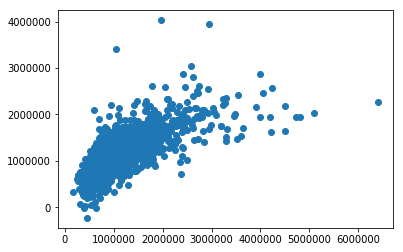

In [34]:
# Actual v predictions scatter
plt.scatter(test_y, y_pred)

In [37]:
#Cofficients
cdf = pd.DataFrame(data= reg.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,121221.409334
Distance,-28814.962815
Bathroom,248170.647983
Landsize,20.870264
BuildingArea,2355.689539
Age,5099.802585


Other Models

In [22]:
svc = SVC()
svc.fit(X_train, train_y)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, train_y) * 100, 2)
acc_svc

98.590000000000003

In [24]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, train_y)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, train_y) * 100, 2)
print(Y_pred)
acc_decision_tree

[  820000.   442500.   631000. ...,   805000.  1625000.   784000.]


99.680000000000007

Graphic Analysis

Text(0.5,1,'Price vs Square Feet')

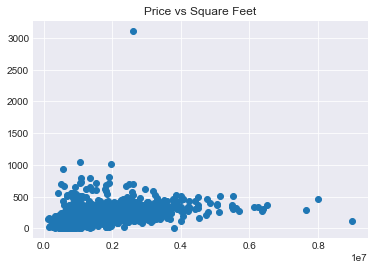

In [54]:
plt.scatter(data_new.Price,data_new.BuildingArea)
plt.title("Price vs Square Feet")

Interpretation based on Latitude and Longitude

Text(0.5,86,'Latitude')

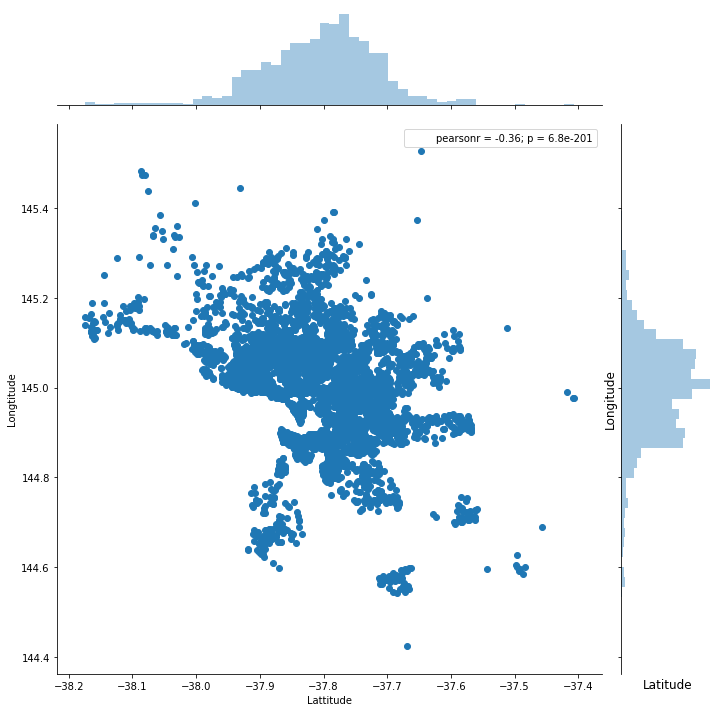

In [42]:
plt.figure(figsize=(10,10))
sb.jointplot(x=data_new.Lattitude, y=data_new.Longtitude, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

 For latitude between -37.6 and -38.0 there are many houses , which would mean that it’s an ideal residential location.But when we talk about longitude we can see that concentration is high between 144.8 to 145.1

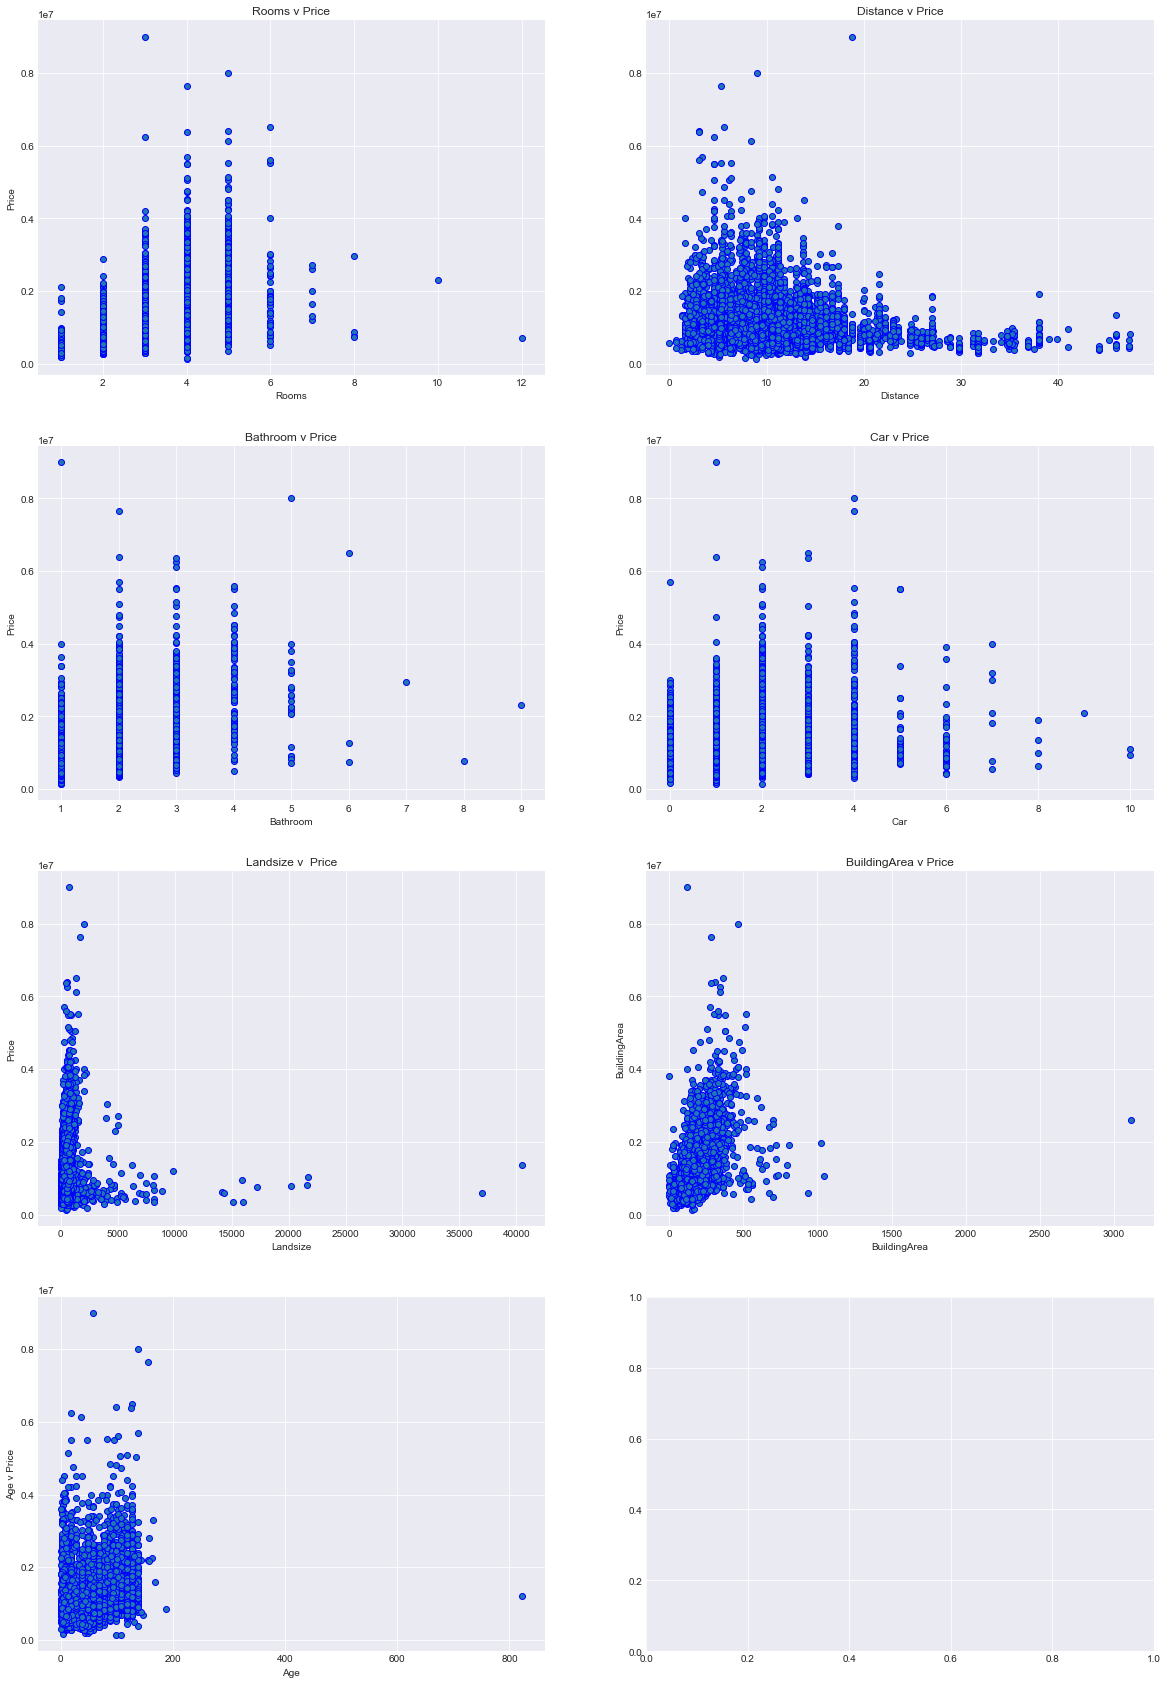

In [46]:
sb.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

axes[0,0].scatter(x = 'Rooms', y = 'Price', data = data_new, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = data_new, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = data_new, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = data_new, edgecolor = 'b')
axes[1,1].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = data_new, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = data_new, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = data_new, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

plt.show()

Correlation

Text(0.5,1,'Variable Correlation')

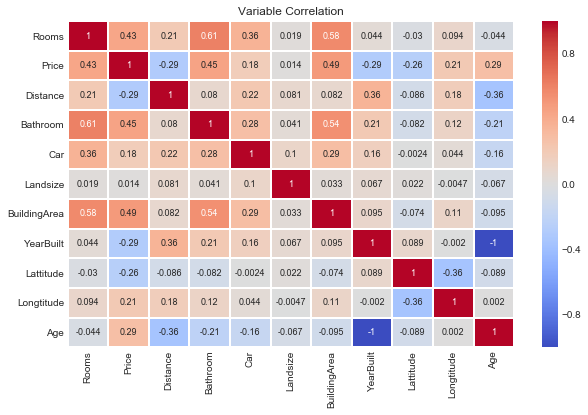

In [48]:
plt.figure(figsize=(10,6))
sb.heatmap(data_new.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')